<a href="https://colab.research.google.com/github/Gauravsaha-97/Admission_Chance_Prediction/blob/master/Admission_Chances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv("/content/drive/My Drive/Admission/datasets_14872_228180_Admission_Predict.csv")

train_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
train_data.duplicated().sum()

0

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
train_data.drop('Serial No.', axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

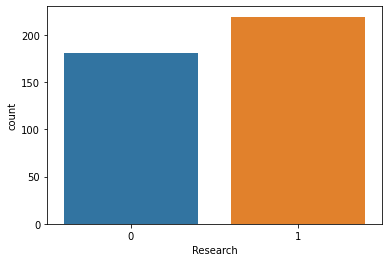

In [7]:
# Plotting of The Research columns
sns.countplot(train_data['Research'])

### The number of Research Persons is more.

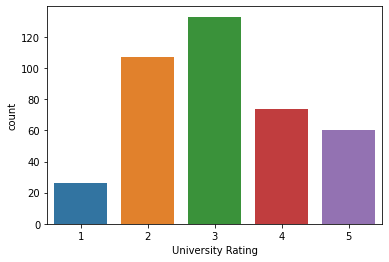

In [8]:
sns.countplot(train_data['University Rating'])

### 3-rated University students are more as compared to others. Minimum number of students are rated 1

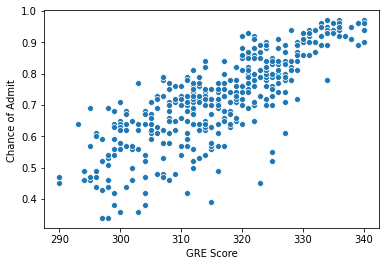

In [9]:
sns.scatterplot(x = 'GRE Score', y = 'Chance of Admit ', data=train_data)

### As the GRE Score increases, the chances of getting admission increases

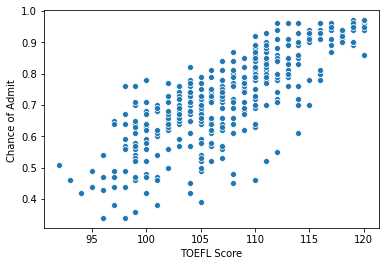

In [10]:
sns.scatterplot(x = 'TOEFL Score', y = 'Chance of Admit ', data=train_data)

### As the TOEFL Score increases, the chances of admission increases

In [11]:
cols_to_encode = ['University Rating','Research']
train_df = pd.get_dummies(data = train_data, columns = cols_to_encode, drop_first=True)

In [12]:
train_df.columns

Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ',
       'University Rating_2', 'University Rating_3', 'University Rating_4',
       'University Rating_5', 'Research_1'],
      dtype='object')

In [13]:
X_train = train_df.drop('Chance of Admit ', axis=1)
Y_train = train_df[['Chance of Admit ']]

In [14]:
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_train.columns

In [15]:
X_train_std.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
0,1.762107,1.746971,1.093864,1.167321,1.764818,-0.604308,-0.705781,2.098906,-0.420084,0.909112
1,0.627656,-0.067635,0.596653,1.167321,0.455151,-0.604308,-0.705781,2.098906,-0.420084,0.909112
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631,-0.604308,1.416869,-0.476439,-0.420084,0.909112
3,0.453126,0.427257,0.099442,-1.061454,0.119339,-0.604308,1.416869,-0.476439,-0.420084,0.909112
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,1.654786,-0.705781,-0.476439,-0.420084,-1.099975


In [16]:
Y_train.shape, X_train_std.shape

((400, 1), (400, 10))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_std, Y_train, test_size=0.2)

In [18]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, Y_train)
pred  = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print(f"Mean Sequared Error of our model is {mean_squared_error(Y_test, pred)}")
print(f"Mean Absolute Error of our model is {mean_absolute_error(Y_test, pred)}")

Mean Sequared Error of our model is 0.0225515
Mean Absolute Error of our model is 0.11757499999999999
